## Introduction to 3D Plotting

Week 8, Class 1 (and 2)
May 16th and 18th, 2022


Intro to 3d plotting, with color

This notebook will go over how to plot 3D or gridded data


In [7]:
## Import necessary packages for I/O and plotting:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib notebook

We'll use Sea Surface Temperature (SST) across the globe as an example for this. First, we read it in:

In [2]:
## Define the path to the file:
sst_path = 'C://Users//vjs/data_for_class//sst_win.txt'

## Read in to a dataframe with pandas:
sst_data = pd.read_csv(sst_path,names=['lon','lat','sst'],delimiter='\t',header=0)

In [3]:
## look at the data
sst_data

,lon,lat,sst
0,0.5,89.5,-1.8
1,1.5,89.5,-1.8
2,2.5,89.5,-1.8
3,3.5,89.5,-1.8
4,4.5,89.5,-1.8
...,...,...,...
64795,355.5,-89.5,-1.8
64796,356.5,-89.5,-1.8
64797,357.5,-89.5,-1.8
64798,358.5,-89.5,-1.8


<IPython.core.display.Javascript object>


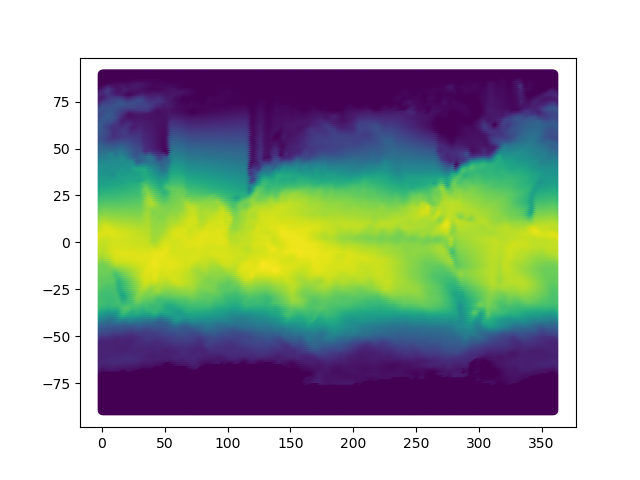

In [8]:
## The data are read in, but do they make sense? visualize it..

plt.figure()
plt.scatter(sst_data.lon,sst_data.lat,c=sst_data.sst)  ## plot longitude as x, latitude as y, color by SST

This worked sort of ok, but if we zoom in or want to make a plot of a subset of the globe, we'll see individual scattered points. Looks pixelated. 

What we really want, is to make a mesh or grid, and plot that mesh.

Before we go into that, let's explore the data...

0.5 359.5
-89.5 89.5


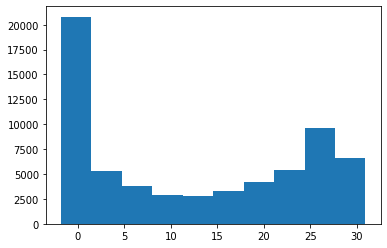

In [5]:
## Make a histogram of the data:

plt.figure()
plt.hist(sst_data.sst)

## and min/max of lon/lat:
print(np.min(sst_data.lon.values),np.max(sst_data.lon.values))
print(np.min(sst_data.lat.values),np.max(sst_data.lat.values))

Another way to plot these data are with a meshed grid. 

This is better because it will interpolate betwen poins on the gird or mesh, and makes a continuous 2d plot that is colored.

In order to make this mesh, we need X, Y, and Z values (lon, lat, and SST, respectively) as "meshes" - or 2D arrays.

We need this for a variety of "gridded" functions. 

Some examples we'll look at next time:
    
    1. contour
    2. pcolor, pcolormesh
    3. imagesc

The end goal: three 2D arrays to hand off to these functions....

We need them to look like:

Let's say we have "n" x points, and "m" y points

1. A grid of X points:
[x1,x2,....xn]
[x1,x2,....xn]
[x1,x2,....xn]
...
[x1,x2,....xn] <= there should be m rows


2. A grid of Y points:
[y1,y1,....y1] <= there should be n columns
[y2,y2,....y2]
....
[ym,ym,....ym]


3. A grid of Z points that corresponds to our X and Y grids:
[Z_x1y1,Z_x2y1,Z_x3y1,...Z_xny1]
[Z_x1y2,Z_x2y2,Z_x3y2,...Z_xny2]
...
[Z_x1ym,Z_x2ym,Z_x3ym,...Z_xnym]


That way, each poin combination (index) between these three arrays can be used together to match for a grid.



## making the grids...

Let's talk about how to make these grids.

We're going to do is loop over every element/value in our large dataframe (every SST point).
Each of these represents some combination of longitude/latitude points.

For our data, the latitude is held the same while the longitude increases, until every possible combination of latitude 1 has been made with all the longitudes.

Then the latitude increases, to latitude2, and the longitude loops again.


We'll loop over the total number of unique latitudes, and while we are in that loop, we will make a nested loop. This outer loop writes the rows of Z.

The inside loop will loop over the unique longitudes, and it writes the columns.

Effectively, in each individual iteration, we're going over every possible permutation of lon/lat pairs. Each permutation corresponds to the next entry (k) in the SST array.


In [9]:
## How many rows are there in our original dataframe?
len(sst_data)

64800

In [11]:
## Start a counter, k, to represents the total numer of entries we have extracted from SST:
k = 0

## To loop over the unqiue latitude/longitudes, we need to extract them:
numlon = len(np.unique(sst_data.lon))
numlat = len(np.unique(sst_data.lat))
print(numlon)
print(numlat)

## Make a 2D array to represent the SST grid, fill with zeros, and then replace in the loops:
SST = np.zeros((numlat,numlon))
print(SST)

## Next, loop over the 1D sst array, and use these values to fill the 2D SST array:
for i_lat in range(numlat): ## i_lat goes from 0 to 179
    ## Then, make an inner loop that loops over the number of longitudes:
    for j_lon in range(numlon): ## j_lon goes from 0 to 359
        
        ## Fill the 2D SST grid with the value from the 1D array (sst column of sst_data)
        SST[i_lat,j_lon] = sst_data.sst[k]
        
        ## and must add to counter:
        k+=1
        
print(SST)

360
180
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[-1.8  -1.8  -1.8  ... -1.8  -1.8  -1.8 ]
 [-1.8  -1.8  -1.8  ... -1.8  -1.8  -1.8 ]
 [-1.77 -1.76 -1.76 ... -1.79 -1.79 -1.79]
 ...
 [-1.8  -1.8  -1.8  ... -1.8  -1.8  -1.8 ]
 [-1.8  -1.8  -1.8  ... -1.8  -1.8  -1.8 ]
 [-1.8  -1.8  -1.8  ... -1.8  -1.8  -1.8 ]]


To make the X and Y arrays, we use the function numpy.meshgrid.

We give it the unique values of longitude and latitude, in 1D array form. It makes the 2D arrays we talked about, where the shape is based off of the length of longitude, and length of latitude.

In [13]:
## Get X and Y with meshgrid:
X,Y = np.meshgrid(np.unique(sst_data.lon),np.unique(sst_data.lat))

## print the shape of them:
print(X.shape)
print(Y.shape)
print(SST.shape)

## print the arrays:
print(X)
print(Y)
print(SST)

(180, 360)
(180, 360)
(180, 360)
[[  0.5   1.5   2.5 ... 357.5 358.5 359.5]
 [  0.5   1.5   2.5 ... 357.5 358.5 359.5]
 [  0.5   1.5   2.5 ... 357.5 358.5 359.5]
 ...
 [  0.5   1.5   2.5 ... 357.5 358.5 359.5]
 [  0.5   1.5   2.5 ... 357.5 358.5 359.5]
 [  0.5   1.5   2.5 ... 357.5 358.5 359.5]]
[[-89.5 -89.5 -89.5 ... -89.5 -89.5 -89.5]
 [-88.5 -88.5 -88.5 ... -88.5 -88.5 -88.5]
 [-87.5 -87.5 -87.5 ... -87.5 -87.5 -87.5]
 ...
 [ 87.5  87.5  87.5 ...  87.5  87.5  87.5]
 [ 88.5  88.5  88.5 ...  88.5  88.5  88.5]
 [ 89.5  89.5  89.5 ...  89.5  89.5  89.5]]
[[-1.8  -1.8  -1.8  ... -1.8  -1.8  -1.8 ]
 [-1.8  -1.8  -1.8  ... -1.8  -1.8  -1.8 ]
 [-1.77 -1.76 -1.76 ... -1.79 -1.79 -1.79]
 ...
 [-1.8  -1.8  -1.8  ... -1.8  -1.8  -1.8 ]
 [-1.8  -1.8  -1.8  ... -1.8  -1.8  -1.8 ]
 [-1.8  -1.8  -1.8  ... -1.8  -1.8  -1.8 ]]


## Plotting!!

Now we can plot it! Let's use contour first, to put contour lines on the grid.

Contour takes the three 2D arrays, number of contours ("levels"), width of contour lines, colormap (can color the contours based on a continuous color map).



<IPython.core.display.Javascript object>


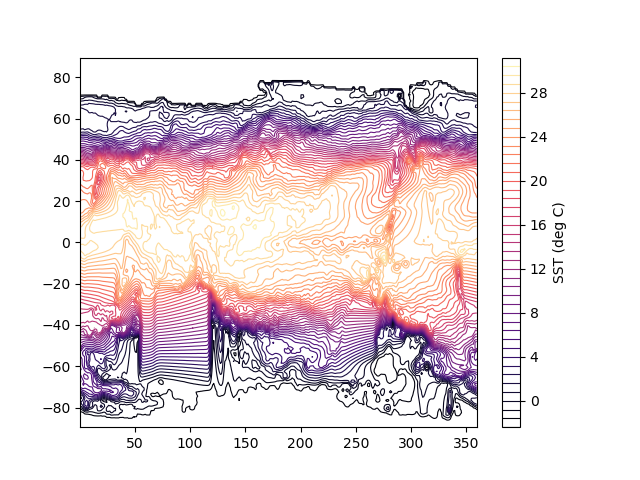

In [15]:
## Initiate the figure:
plt.figure()

## Contour, using our three grids, #contours, line width, and colormap
plt.contour(X,Y,SST,40,linewidths=0.8,cmap='magma')

## Add a colorbar so we know what color is what SST:
cb = plt.colorbar()
## Set a label on the colorbar:
cb.set_label('SST (deg C)')

<IPython.core.display.Javascript object>


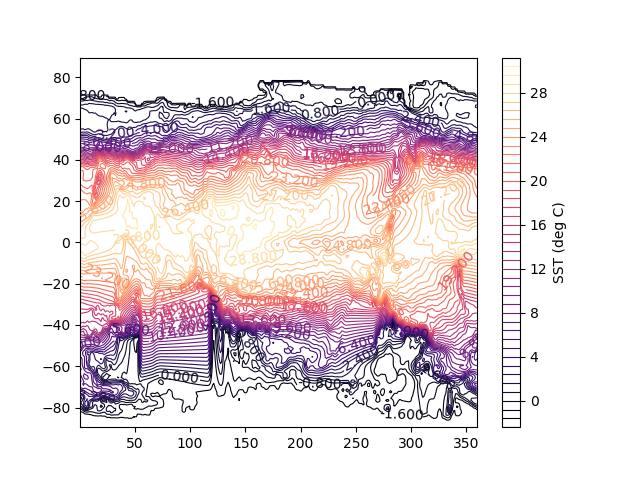

In [16]:
## Initiate the figure:
plt.figure()

## Contour, using our three grids, #contours, line width, and colormap
sstcontours = plt.contour(X,Y,SST,40,linewidths=0.8,cmap='magma')

## To add labels to the contours:
plt.clabel(sstcontours,inline=1,fontsize=10)

## Add a colorbar so we know what color is what SST:
cb = plt.colorbar()
## Set a label on the colorbar:
cb.set_label('SST (deg C)')

What if we want to make a continuous colored mesh?

Use pcolormesh

<IPython.core.display.Javascript object>


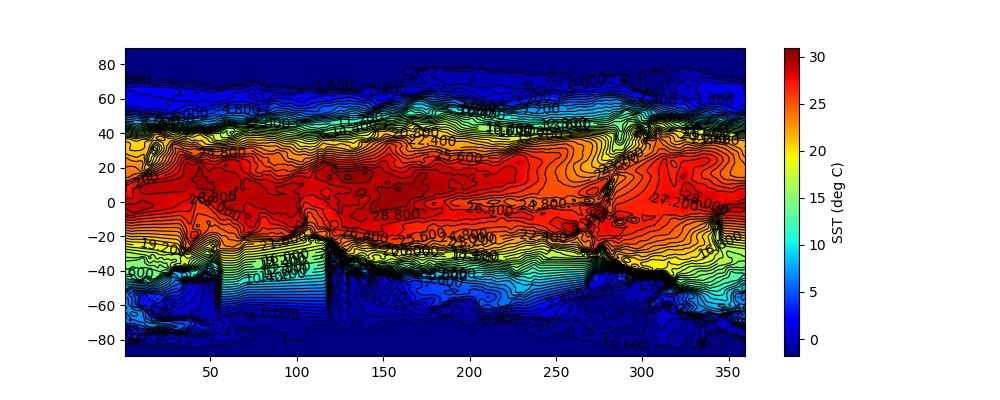

<a list of 79 text.Text objects>

In [19]:
## Initiate figure, 10 inches wide and 4 inches high
plt.figure(figsize=(10,4))

## Plot the colors...
plt.pcolormesh(X,Y,SST,cmap='jet')

## Give a colorbar:
cb = plt.colorbar()
## add label to colorbar:
cb.set_label('SST (deg C)')

## Contour, using our three grids, #contours, line width, and colormap
sstcontours = plt.contour(X,Y,SST,40,linewidths=0.8,colors='black')

## To add labels to the contours:
plt.clabel(sstcontours,inline=1,fontsize=10)